## Importando as dependências do projeto

In [3]:
import numpy as np
from scipy.stats import shapiro, pearsonr, spearmanr
import matplotlib.pyplot as plt

## Base de dados para análise

In [5]:
grupo_a = [3, 5, 7, 9, 11]
grupo_b = [2, 4, 6, 8, 10]

## Exibir os valores de média, mediana e desvio padrão de cada grupo.

In [7]:
media_a = np.mean(grupo_a)
mediana_a = np.median(grupo_a)
desvio_a = np.std(grupo_a, ddof=1) 

media_b = np.mean(grupo_b)
mediana_b = np.median(grupo_b)
desvio_b = np.std(grupo_b, ddof=1)

print(f"Grupo A - Média: {media_a}, Mediana: {mediana_a}, Desvio padrão: {desvio_a}")
print(f"Grupo B - Média: {media_b}, Mediana: {mediana_b}, Desvio padrão: {desvio_b}")

Grupo A - Média: 7.0, Mediana: 7.0, Desvio padrão: 3.1622776601683795
Grupo B - Média: 6.0, Mediana: 6.0, Desvio padrão: 3.1622776601683795


## Teste de Normalidade (Shapiro-Wilk)

In [8]:
shapiro_a = shapiro(grupo_a)
shapiro_b = shapiro(grupo_b)

print("Shapiro-Wilk Grupo A:", shapiro_a)
print("Shapiro-Wilk Grupo B:", shapiro_b)

Shapiro-Wilk Grupo A: ShapiroResult(statistic=np.float64(0.986762155211559), pvalue=np.float64(0.9671739349728582))
Shapiro-Wilk Grupo B: ShapiroResult(statistic=np.float64(0.986762155211559), pvalue=np.float64(0.9671739349728582))


## Correlação

Escolha do teste (Pearson ou Spearman) com base na normalidade 

In [10]:

if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    corr, p_val = pearsonr(grupo_a, grupo_b)
    tipo = "Pearson"
else:
    corr, p_val = spearmanr(grupo_a, grupo_b)
    tipo = "Spearman"

print(f"Correlação ({tipo}): coeficiente = {corr}, valor-p = {p_val}")

Correlação (Pearson): coeficiente = 1.0, valor-p = 0.0


## Normalidade verificada antes de escolher o teste de correlação pelos seguintes fatores a seguir: 

1. Correlação de Pearson:

- Pressupõe normalidade dos dados;

- Mede uma relação linear entre duas variáveis contínuas;

- É sensível a outliers e a dados assimétricos;

- Deve ser usada somente se os dados forem aproximadamente normais (valor-p > 0.05 no teste de Shapiro-Wilk).

2. Correlação de Spearman:

- Não exige normalidade;

- É uma correlação não paramétrica que avalia a ordem (ranking) dos dados em vez dos valores absolutos;

- Funciona bem com distribuições assimétricas, dados com outliers ou relações monotônicas não-lineares.


E para finalizar, é importante ressaltar que o teste de Shapiro-Wilk verifica se os dados seguem uma distribuição normal:

Se o valor-p > 0.05, não há evidência contra a normalidade → Utilizar Pearson.

Se o valor-p ≤ 0.05, os dados provavelmente não são normais → Utilizar Spearman.


Por isso, se os dados de grupo_a ou grupo_b não forem normalmente distribuídos, Pearson pode retornar um resultado incorreto ou distorcido. Usar Spearman nesse caso é mais seguro, pois ele não depende da distribuição.

Aqui os dados são normalmente distribuídos e por isso faz sentido utilizar o teste de Pearson.

## Gráfico de dispersão

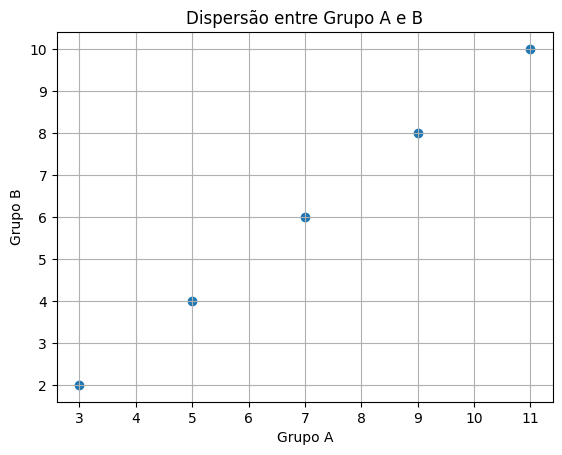

In [15]:
plt.scatter(grupo_a, grupo_b)
plt.title('Dispersão entre Grupo A e B')
plt.xlabel('Grupo A')
plt.ylabel('Grupo B')
plt.grid(True)
plt.show()